In [7]:
import cv2
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline as mpimg


Reading the MRI DICOM image of brain

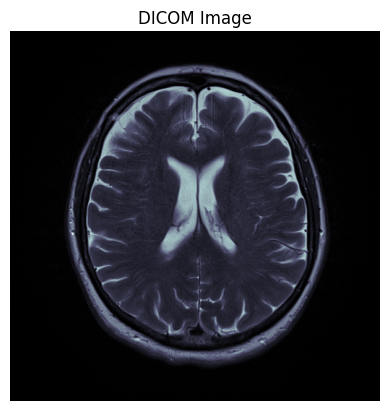

In [8]:
#read the DICOM file
filename = pydicom.dcmread('/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/Head_MRI.dcm')

#read the image pixel values
mri = filename.pixel_array

# Display the image
plt.imshow(mri, cmap=plt.cm.bone)
plt.title("DICOM Image")
plt.axis('off')
plt.show()

In [9]:
mri.shape

(512, 512)

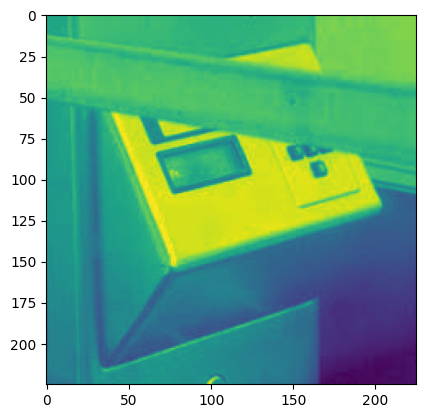

In [10]:
bdot =cv2.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/blackdot.jpg",cv2.IMREAD_GRAYSCALE)
atm =cv2.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/atm.jpg",cv2.IMREAD_GRAYSCALE)
bdot.shape
plt.imshow(atm)

Plotting the Histogram of the image

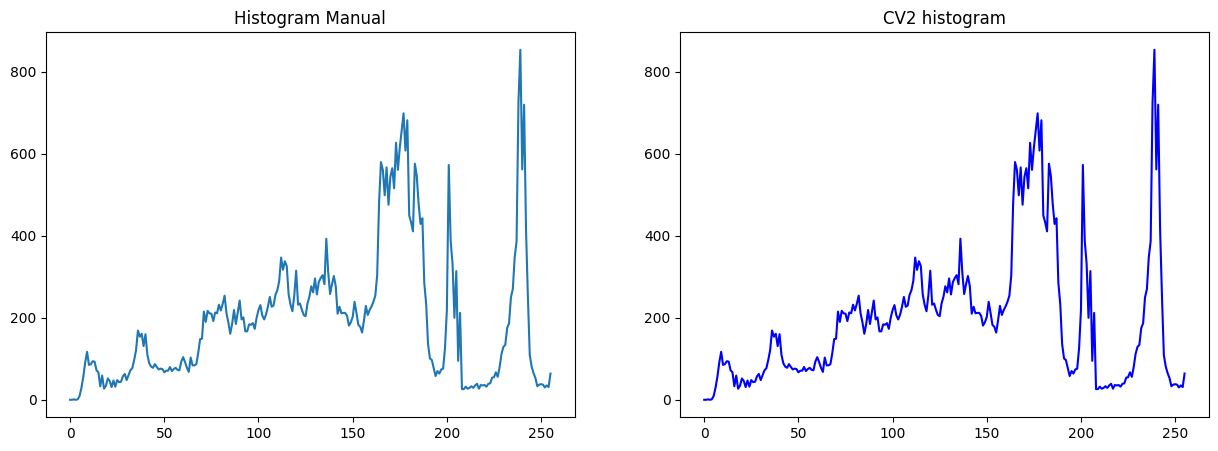

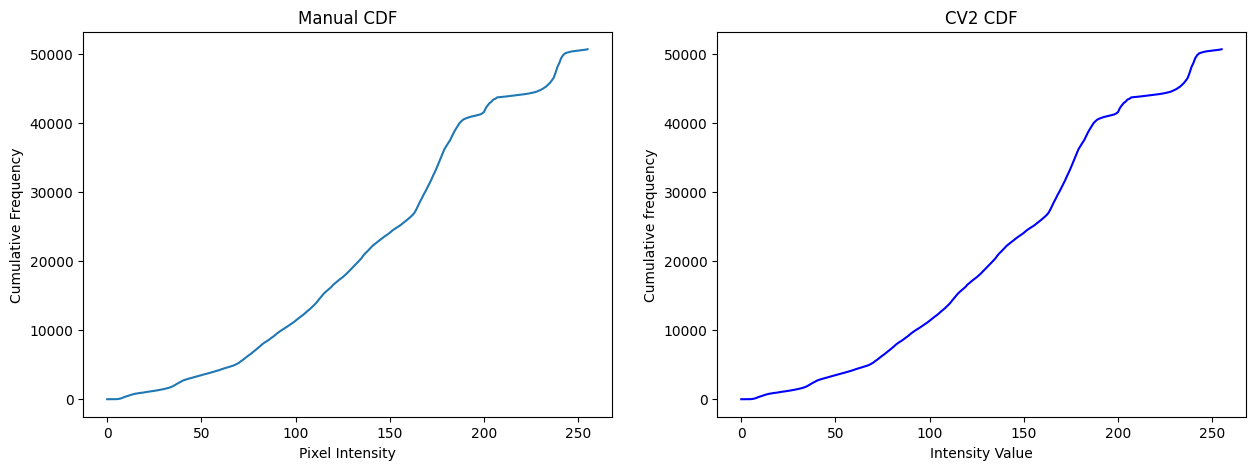

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function for image histogram
def img_hist(img):
    # Normalize the pixel values to the range of 0-255 if it's not in that range
    if img.dtype != np.uint8:
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Initialize histogram
    histogram = np.zeros(256, dtype=int)

    # Calculate histogram
    for row in img:
        for pixel in row:
            histogram[pixel] += 1
    return histogram

# Function for Cumulative Distribution Function
def img_cdf(histogram):
    cdf = np.zeros(256, dtype=float)

    x = 0
    for i in range(256):
        x += histogram[i]
        cdf[i] = x

    return cdf

# Load image as grayscale
img = atm
# Ensure the image is of type uint8
if img.dtype != np.uint8:
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Calculate histogram
hist_manual = img_hist(img)

#PLOT HISTOGRAM
# Create a plot with a 1x2 grid of subplots
plot, axes = plt.subplots(1, 2, figsize=(15, 5))
# Display the histogram formed manually
axes[0].plot(hist_manual)
axes[0].set_title("Histogram Manual")
# Display the histogram using cv2
cv_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
axes[1].plot(cv_hist, color='b')
axes[1].set_title("CV2 histogram")

##PLOT CDF
# Plot the manual CDF
cdf = img_cdf(hist_manual) 
plt.figure(figsize=(15, 5))
# Plot
plt.subplot(1, 2, 1)
plt.plot(cdf)
plt.title("Manual CDF")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Frequency")

#Compute CDF using cv2
#  Calculate the histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# Calculate the CDF 
cdf = hist.cumsum()
# plot
plt.subplot(1, 2, 2)
plt.plot(cdf, color='b')
plt.title('CV2 CDF')
plt.xlabel('Intensity Value')
plt.ylabel('Cumulative frequency')
plt.show()

Doing Histogram Equaliaztion to the image

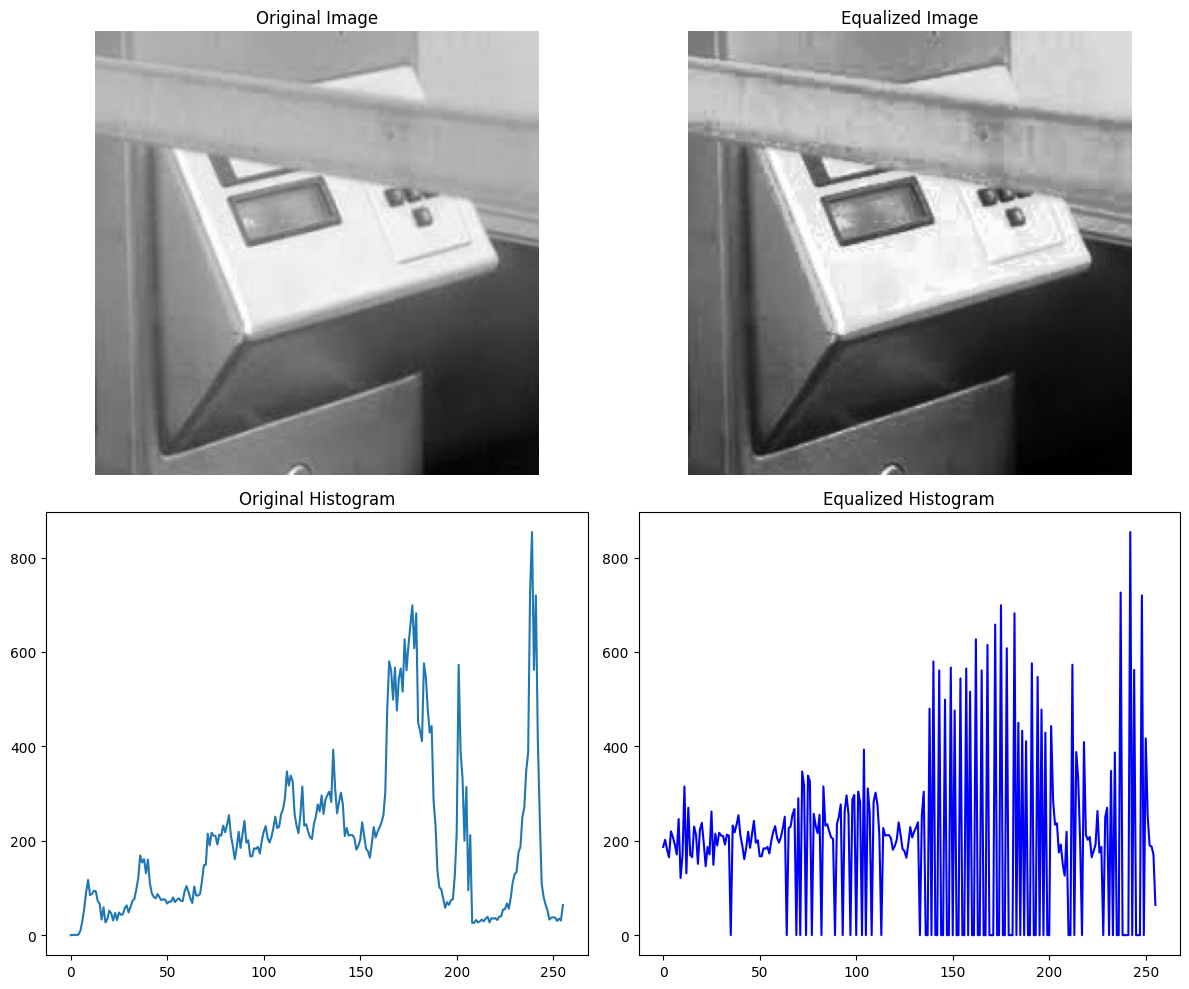

In [12]:
# Function for image histogram
def img_hist(img):
    
    # Calculate histogram
    histogram = np.zeros(256, dtype=int)
    for row in img:
        for pixel in row:
            histogram[pixel] += 1
    return histogram

# Function for CDF
def img_cdf(histogram):
    cdf = np.zeros(256, dtype=float)
    x = 0
    for i in range(256):
        x += histogram[i]
        cdf[i] = x
    return cdf

# Load the image
img = atm
# Ensure the image is in the range 0-255
if img.dtype != np.uint8:
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# Compute histogram
histogram = img_hist(img)

# Compute Cumulative Distribution Function
cdf = img_cdf(histogram)

# Normalize the CDF to the range [0, 255]
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

# Apply Transfer Function
new_pxl = cdf_normalized.astype(np.uint8)

# Mapping original pixels to equalized values
equalized_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        equalized_img[i, j] = new_pxl[img[i, j]]

# Plot histograms and images
plt.figure(figsize=(12, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

# Equalized Image
plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

# Original Histogram
plt.subplot(2, 2, 3)
plt.title("Original Histogram")
plt.plot(histogram)

# Equalized Histogram
equalized_histogram = img_hist(equalized_img)
plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.plot(equalized_histogram,color = "b")

plt.tight_layout()
plt.show()


Contrast stretching

/tmp/ipykernel_2694547/372181680.py:44: RuntimeWarning: overflow encountered in scalar multiply
  cstretched_img[i, j] = (img[i, j]-x[0])*(y[1]-y[0])/(x[1]-x[0]) + y[0]


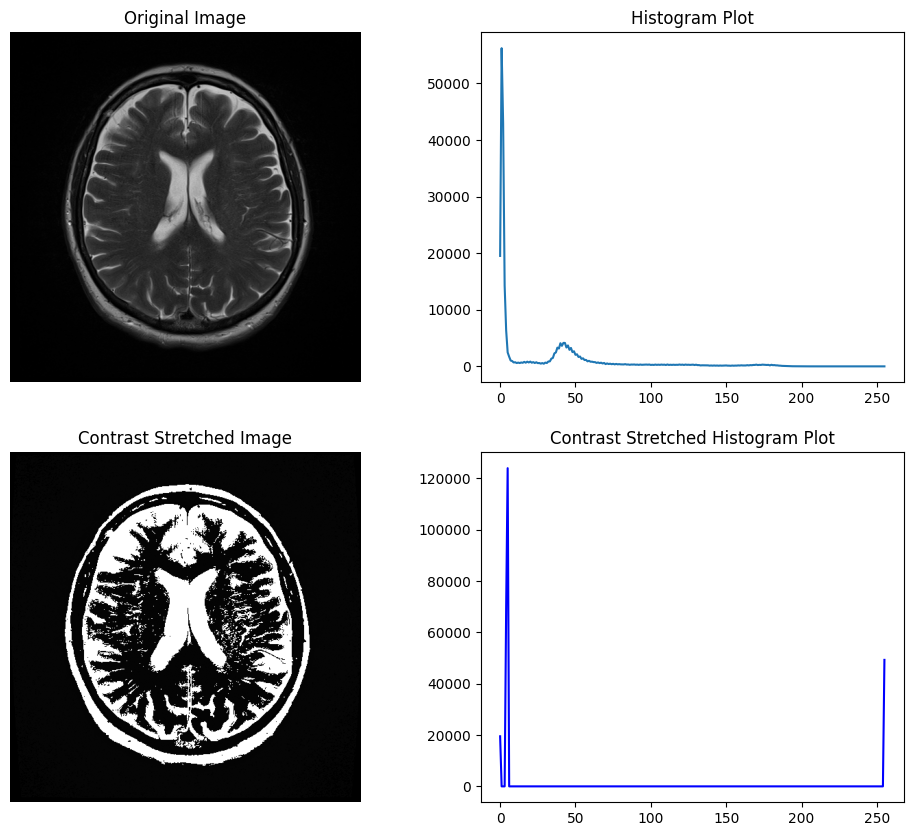

In [15]:
# img_hist(image) function helps to compute the histogram values

#load the image
img = mri

#normalize the image if not in 0-255 range
if img.dtype != np.uint8:
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

image_histogram = img_hist(img)

# plot the original image and its histogram
plt.figure(figsize=(12, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap = "gray")
plt.axis('off')

# Histogram Image
plt.subplot(2, 2, 2)
plt.title("Histogram Plot")
plt.plot(image_histogram)


'''#Take inputs from user
x= int(input("what are the lower and the upper limits of the intensity value to be stretched?"))
y =list(int(input("\nWhat are the lower and upper limits of intensity value you want the image to have?").split(" ")))
'''
x = [0,50]
y = [0,255]

#Mapping the old pixels to the new pixels
cstretched_img = np.zeros_like(img,dtype = np.float32) #create a zero matrix of size of img
for i in range(img.shape[0]): #go to each row
    for j in range(img.shape[1]): # go to individual pixels in a row
        # Ensure the pixel value is within the specified range
        if img[i, j] < x[0]:
            cstretched_img[i, j] = y[0]
        elif img[i, j] > x[1]:
            cstretched_img[i, j] = y[1]
        else:
            cstretched_img[i, j] = (img[i, j]-x[0])*(y[1]-y[0])/(x[1]-x[0]) + y[0]
            
# Convert back to uint8 after contrast stretching
cstretched_img = np.clip(cstretched_img, 0, 255).astype(np.uint8)

#compute the histogram of the contrast stretched image
cstretched_img_hist = img_hist(cstretched_img)

#Plotting the contrast stretched image and its histogram
# Contrast Stretched Image
plt.subplot(2, 2, 3)
plt.title("Contrast Stretched Image")
plt.imshow(cstretched_img, cmap = "gray")
plt.axis('off')

# Contrast Stretched Histogram Plot
plt.subplot(2, 2, 4)
plt.title("Contrast Stretched Histogram Plot")
plt.plot(cstretched_img_hist, color= 'b')
